In [13]:
#Importing required packages as instructed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [14]:
#Loading the dataset
data = pd.read_csv('PCA_practice_dataset.csv')
data.head()
#Convert the data to numpy
X = data.to_numpy()
X.shape

(8041, 35)

In [15]:
#Scale the data with mean = 0 and standard deviation =1 before we apply PCA
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [16]:

#Apply Pca
pca = PCA()
X = pca.fit_transform(X)

#Get a sum of all the eigen values for the corresponding eigen vectors
cumalitive_varience = np.cumsum(pca.explained_variance_ratio_)*100

#We declare a list of our desired thresholds
thresholds = [i for i in range(90,97+1,1)]

#We make a list of the componenets required to retain the varience as mentioned in our requred threshold list
components=[np.argmax(cumalitive_varience > threshold) for threshold in thresholds ]

for component , threshold in zip(components,thresholds):
    print("Components required for {}% threshold are:{}".format(threshold,component))

Components required for 90% threshold are:2
Components required for 91% threshold are:2
Components required for 92% threshold are:3
Components required for 93% threshold are:3
Components required for 94% threshold are:4
Components required for 95% threshold are:4
Components required for 96% threshold are:5
Components required for 97% threshold are:6


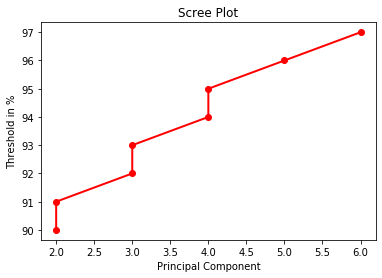

In [17]:
#Plotting these data in the form of a scree plot 

plt.plot(components, range(90,97+1,1), 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Threshold in %')
plt.show()


In [18]:
#Now we perform dimensionality reduction
X_orig = X

for component,var in zip(components,threholds):
    pca = PCA(n_components = component) #We pass the number of components required for each threshold
    X_transformed = pca.fit_transform(X_orig) #We get the reduced dimensionality dataset
    print('Performing dimensionality reduction to retain {}% threshold  '.format(var))
    print('After dimensionality reduction , new shape of the dataset is :',X_transformed.shape)
    print('\n')

Performing dimensionality reduction to retain 90% threshold  
After dimensionality reduction , new shape of the dataset is : (8041, 2)


Performing dimensionality reduction to retain 91% threshold  
After dimensionality reduction , new shape of the dataset is : (8041, 2)


Performing dimensionality reduction to retain 92% threshold  
After dimensionality reduction , new shape of the dataset is : (8041, 3)


Performing dimensionality reduction to retain 93% threshold  
After dimensionality reduction , new shape of the dataset is : (8041, 3)


Performing dimensionality reduction to retain 94% threshold  
After dimensionality reduction , new shape of the dataset is : (8041, 4)


Performing dimensionality reduction to retain 95% threshold  
After dimensionality reduction , new shape of the dataset is : (8041, 4)


Performing dimensionality reduction to retain 96% threshold  
After dimensionality reduction , new shape of the dataset is : (8041, 5)


Performing dimensionality reduction to re